In [1]:
import essentia
import IPython
import essentia.standard as es
from pylab import plot, show, figure, imshow

In [2]:
import IPython
IPython.display.Audio('samples/145792817.wav')
target_filename = 'samples/145792817.wav'

In [3]:
import essentia
import essentia.standard as es

# Compute all features, aggregate only 'mean' and 'stdev' statistics for all low-level, rhythm and tonal frame features
features, features_frames = es.MusicExtractor(lowlevelStats=['mean', 'stdev'],
                                              rhythmStats=['mean', 'stdev'],
                                              tonalStats=['mean', 'stdev'])('samples/145792817.wav')

# See all feature names in the pool in a sorted order
print(sorted(features.descriptorNames()))

['lowlevel.average_loudness', 'lowlevel.barkbands.mean', 'lowlevel.barkbands.stdev', 'lowlevel.barkbands_crest.mean', 'lowlevel.barkbands_crest.stdev', 'lowlevel.barkbands_flatness_db.mean', 'lowlevel.barkbands_flatness_db.stdev', 'lowlevel.barkbands_kurtosis.mean', 'lowlevel.barkbands_kurtosis.stdev', 'lowlevel.barkbands_skewness.mean', 'lowlevel.barkbands_skewness.stdev', 'lowlevel.barkbands_spread.mean', 'lowlevel.barkbands_spread.stdev', 'lowlevel.dissonance.mean', 'lowlevel.dissonance.stdev', 'lowlevel.dynamic_complexity', 'lowlevel.erbbands.mean', 'lowlevel.erbbands.stdev', 'lowlevel.erbbands_crest.mean', 'lowlevel.erbbands_crest.stdev', 'lowlevel.erbbands_flatness_db.mean', 'lowlevel.erbbands_flatness_db.stdev', 'lowlevel.erbbands_kurtosis.mean', 'lowlevel.erbbands_kurtosis.stdev', 'lowlevel.erbbands_skewness.mean', 'lowlevel.erbbands_skewness.stdev', 'lowlevel.erbbands_spread.mean', 'lowlevel.erbbands_spread.stdev', 'lowlevel.gfcc.cov', 'lowlevel.gfcc.icov', 'lowlevel.gfcc.mean

In [4]:
print("Filename:", features['metadata.tags.file_name'])
print("-"*80)
print("Replay gain:", features['metadata.audio_properties.replay_gain'])
print("EBU128 integrated loudness:", features['lowlevel.loudness_ebu128.integrated'])
print("EBU128 loudness range:", features['lowlevel.loudness_ebu128.loudness_range'])
print("-"*80)
print("MFCC mean:", features['lowlevel.mfcc.mean'])
print("-"*80)
print("BPM:", features['rhythm.bpm'])
print("Beat positions (sec.)", features['rhythm.beats_position'])
print("-"*80)
print("Key/scale estimation (using a profile specifically suited for electronic music):",
      features['tonal.key_edma.key'], features['tonal.key_edma.scale'])


Filename: 145792817.wav
--------------------------------------------------------------------------------
Replay gain: -15.252279281616211
EBU128 integrated loudness: -11.640365600585938
EBU128 loudness range: 7.574485778808594
--------------------------------------------------------------------------------
MFCC mean: [-8.2772552e+02  8.4028244e+01 -8.4315710e+00 -1.0788632e+01
 -3.9410313e+01 -1.3055232e+01 -3.1988292e+00 -2.4553812e+01
 -1.5177480e+01  8.6661771e-02 -7.1740317e+00 -7.7804246e+00
 -1.5914055e+00]
--------------------------------------------------------------------------------
BPM: 151.67872619628906
Beat positions (sec.) [ 0.5456689  1.1029478  1.6718367  2.2407255  2.7747846  3.3204534
  3.8777323  4.4466214  5.01551    5.584399   6.095238   6.6176867
  7.140136   7.6509748  8.161814   8.661043   9.160272   9.647891
 10.1471195 10.634739  11.122358  11.609977  12.120816  12.608435
 13.107664  13.676553  14.257051  14.825941  15.3019495 15.754739
 16.230747  16.706757 

In [5]:
from essentia.standard import *

# Loading audio file
audio = MonoLoader(filename='samples/145792817.wav')()
# Compute beat positions and BPM
rhythm_extractor = RhythmExtractor2013(method="multifeature")
bpm, beats, beats_confidence, _, beats_intervals = rhythm_extractor(audio)

print("BPM:", bpm)
print("Beat positions (sec.):", beats)
print("Beat estimation confidence:", beats_confidence)

# Mark beat positions on the audio and write it to a file
# Let's use beeps instead of white noise to mark them, as it's more distinctive
marker = AudioOnsetsMarker(onsets=beats, type='beep')
marked_audio = marker(audio)
MonoWriter(filename='outputs/145792817_beats.wav')(marked_audio)


BPM: 123.20525360107422
Beat positions (sec.): [ 0.4643991  0.8707483  1.2887075  1.6950567  2.124626   2.530975
  2.9257143  3.3204534  3.7732425  4.237642   4.7020407  5.1896596
  5.677279   6.2345576  6.7802267  7.2910657  7.8135147  8.301134
  8.800363   9.311202   9.78721   10.27483   10.774058  11.284898
 11.784127  12.283356  12.770975  13.2353735 13.757823  14.280272
 14.837551  15.36      15.836009  16.323627  16.764807  17.240816
 17.681995  18.146395  18.622404  19.086802  19.5512    20.02721
 20.53805   21.01406   21.478458  21.942856  22.418865  22.894875
 23.382494  23.881723  24.357733  24.88018   25.3678    25.82059
 26.319818  26.807438  27.306665  27.805895  28.351564  28.885624
 29.454512  30.058231  30.65034   31.242449  31.846167  32.449886
 33.041996  33.610886  34.17977   34.783493  35.36399   35.90966
 36.490158  37.047436  37.627937  38.173603  38.800545  39.427483
 40.066032  40.70458   41.31991   41.970066  42.608616 ]
Beat estimation confidence: 0.2274601906

In [6]:
IPython.display.Audio('outputs/145792817_beats.wav')

In [18]:
from essentia.standard import *
# Loading audio file
audio = MonoLoader(filename='samples/145792817.wav')()
#audio = MonoLoader(filename='/Users/minsubsim/work/sms-tools/sounds/violin-B3.wav')()


# Phase 1: compute the onset detection function
# The OnsetDetection algorithm provides various onset detection functions. Let's use two of them.

od1 = OnsetDetection(method='hfc')
od2 = OnsetDetection(method='complex')

# Let's also get the other algorithms we will need, and a pool to store the results
w = Windowing(type = 'hann')
fft = FFT() # this gives us a complex FFT
c2p = CartesianToPolar() # and this turns it into a pair (magnitude, phase)
pool = essentia.Pool()

print('11111')
# Computing onset detection functions.
for frame in FrameGenerator(audio, frameSize = 1024, hopSize = 512):
    mag, phase, = c2p(fft(w(frame)))
    pool.add('features.hfc', od1(mag, phase))
    pool.add('features.complex', od2(mag, phase))

    
print('22222')
# Phase 2: compute the actual onsets locations
onsets = Onsets()

onsets_hfc = onsets(# this algo expects a matrix, not a vector
                    essentia.array([ pool['features.hfc'] ]),

                    # you need to specify weights, but as there is only a single
                    # function, it doesn't actually matter which weight you give it
                    [ 1 ])

onsets_complex = onsets(essentia.array([ pool['features.complex'] ]), [ 1 ])


print('3333')
# Mark onsets on the audio, which we'll write back to disk
# We use beeps instead of white noise and stereo signal as it's more distinctive

silence = [0.] * len(audio)

print(onsets_hfc[-10:])
beeps_hfc = AudioOnsetsMarker(onsets=onsets_hfc, type='beep')(silence)
AudioWriter(filename='outputs/remshit_hfc_stereo.wav')(StereoMuxer()(audio, beeps_hfc))

beeps_complex = AudioOnsetsMarker(onsets=onsets_complex, type='beep')(silence)
AudioWriter(filename='outputs/remshit_complex_stereo.wav')(StereoMuxer()(audio, beeps_complex))

11111
22222
3333
[41.56372  41.749477 41.94685  42.09778  42.2371   42.32998  42.446075
 42.631836 42.898865 43.154285]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import essentia
import IPython
from pylab import plot, show, figure, imshow
from essentia.standard import *

fnames = ['155943863.wav','165489427.mp4','badboy.mp3','201804232330421545.wav']
#audio = MonoLoader(filename='/Users/minsubsim/work/sms-tools/sounds/piano.wav')()
fname = 'samples/%s' % (fnames[2])
audio = MonoLoader(filename=fname)()
audio = audio[:1000000]
frameSize = 2048
hopSize = int(frameSize/4)

spr_anal = SprModelAnal(fftSize = frameSize,
                        hopSize = hopSize,
                        maxFrequency = 500,
                        freqDevOffset = 100,
                        freqDevSlope = 0)
spr_synth = SprModelSynth(fftSize = frameSize, hopSize = int(hopSize*1))
overl = OverlapAdd(frameSize = frameSize, hopSize = hopSize, gain = 1.0 / frameSize)
windowing = Windowing(type='blackmanharris62')

output = []
res = np.zeros(2001000)
tt = 0
for frame in FrameGenerator(audio, frameSize=frameSize, hopSize=hopSize):
    w_res = windowing(frame)
    freq, mag, phase, resi = spr_anal(frame)
    spr_synth.hopSize=hopSize*2
    out_f, out_fs, out_fr = spr_synth(mag, freq, phase, resi)
    output.append(out_fs)
    
result_audio = np.asarray(output).flatten()
print(len(audio))
print(result_audio.size)
print(res)
res = essentia.array(res)
MonoWriter(filename='outputs/test.wav')(result_audio)

1000000
1000960
[0. 0. 0. ... 0. 0. 0.]


In [165]:
import IPython
IPython.display.Audio('outputs/test.wav')

In [ ]:
import IPython
IPython.display.Audio('outputs/145792817_complex_stereo.wav')

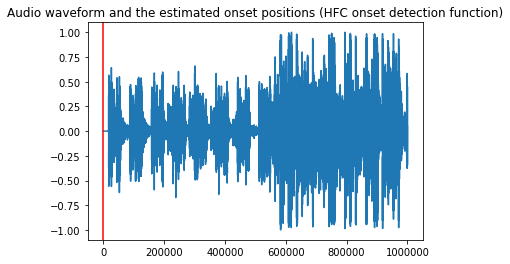

Text(0.5,1,'Audio waveform and the estimated onset positions (complex onset detection function)')

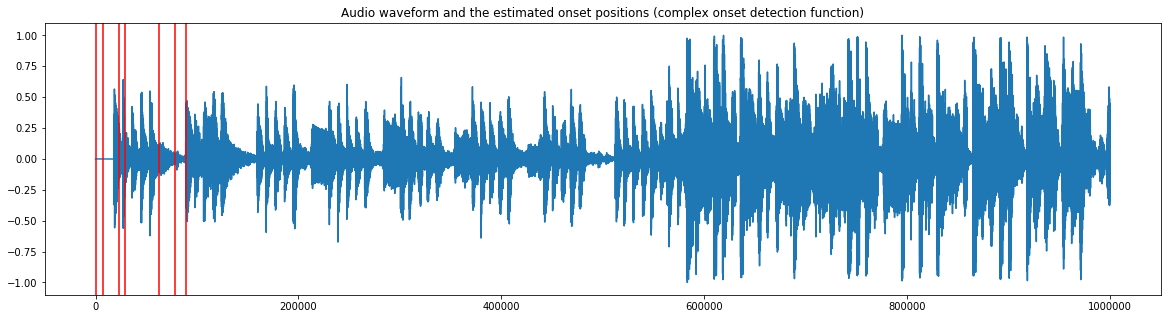

In [9]:
plot(audio)
for onset in onsets_hfc:
    plt.axvline(x=onset*44100, color='red')

plt.title("Audio waveform and the estimated onset positions (HFC onset detection function)")
plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

plot(audio)
for onset in onsets_complex:
    plt.axvline(x=onset*44100, color='red')

plt.rcParams['figure.figsize'] = [20, 5]
plt.title("Audio waveform and the estimated onset positions (complex onset detection function)")

In [ ]:
import numpy
import matplotlib.pyplot as plt

# Load audio file; it is recommended to apply equal-loudness filter for PredominantPitchMelodia
loader = EqloudLoader(filename='samples/remshit.mp4', sampleRate=44100)
audio = loader()
print("Duration of the audio sample [sec]:")
print(len(audio)/44100.0)

# Extract the pitch curve
# PitchMelodia takes the entire audio signal as input (no frame-wise processing is required)

pitch_extractor = PredominantPitchMelodia(frameSize=2048, hopSize=128)
pitch_values, pitch_confidence = pitch_extractor(audio)

# Pitch is estimated on frames. Compute frame time positions
pitch_times = numpy.linspace(0.0,len(audio)/44100.0,len(pitch_values) )

# Plot the estimated pitch contour and confidence over time
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(pitch_times, pitch_values)
axarr[0].set_title('estimated pitch [Hz]')
axarr[1].plot(pitch_times, pitch_confidence)
axarr[1].set_title('pitch confidence')

plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

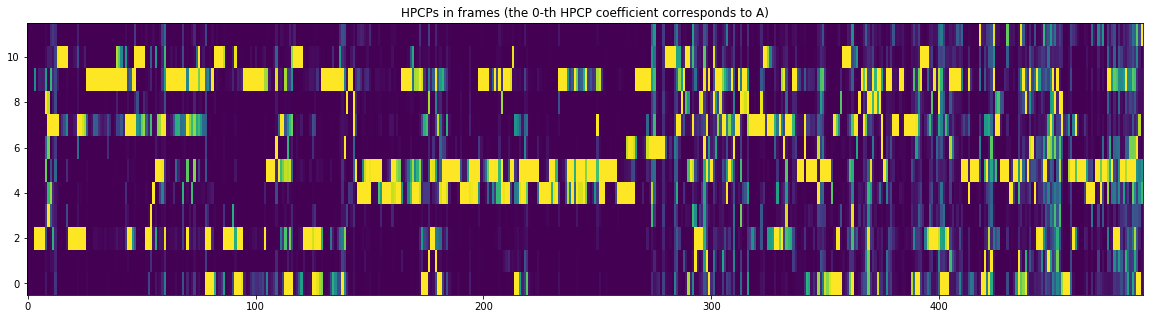

Estimated key and scale: D major


In [14]:
from pylab import plot, show, figure, imshow
import essentia.streaming as ess

# Initialize algorithms we will use
loader = ess.MonoLoader(filename='samples/boomboombang.wav')
framecutter = ess.FrameCutter(frameSize=4096, hopSize=2048, silentFrames='noise')
windowing = ess.Windowing(type='blackmanharris62')
spectrum = ess.Spectrum()
spectralpeaks = ess.SpectralPeaks(orderBy='magnitude',
                                  magnitudeThreshold=0.00001,
                                  minFrequency=20,
                                  maxFrequency=3500,
                                  maxPeaks=60)

# Use default HPCP parameters for plots, however we will need higher resolution
# and custom parameters for better Key estimation

hpcp = ess.HPCP()
hpcp_key = ess.HPCP(size=36, # we will need higher resolution for Key estimation
                    referenceFrequency=440, # assume tuning frequency is 44100.
                    bandPreset=False,
                    minFrequency=20,
                    maxFrequency=3500,
                    weightType='cosine',
                    nonLinear=False,
                    windowSize=1.)

key = ess.Key(profileType='edma', # Use profile for electronic music
              numHarmonics=4,
              pcpSize=36,
              slope=0.6,
              usePolyphony=True,
              useThreeChords=True)

# Use pool to store data
pool = essentia.Pool()
input_audio = ess.VectorInput(audio[:1000000])

# Connect streaming algorithms
input_audio.data >> framecutter.signal
framecutter.frame >> windowing.frame >> spectrum.frame
spectrum.spectrum >> spectralpeaks.spectrum
spectralpeaks.magnitudes >> hpcp.magnitudes
spectralpeaks.frequencies >> hpcp.frequencies
spectralpeaks.magnitudes >> hpcp_key.magnitudes
spectralpeaks.frequencies >> hpcp_key.frequencies
hpcp_key.hpcp >> key.pcp
hpcp.hpcp >> (pool, 'tonal.hpcp')
key.key >> (pool, 'tonal.key_key')
key.scale >> (pool, 'tonal.key_scale')
key.strength >> (pool, 'tonal.key_strength')

# Run streaming network
essentia.run(input_audio)

# Plot HPCP
imshow(pool['tonal.hpcp'].T, aspect='auto', origin='lower', interpolation='none')
plt.title("HPCPs in frames (the 0-th HPCP coefficient corresponds to A)")
plt.rcParams['figure.figsize'] = [20, 5]
show()

print("Estimated key and scale:", pool['tonal.key_key'] + " " + pool['tonal.key_scale'])

In [175]:
pool['tonal.hpcp']

array([[0.00000000e+00, 2.38177545e-05, 1.02349725e-02, 4.32201549e-02,
        3.45698744e-02, 4.68220003e-02, 5.45634031e-01, 9.58648771e-02,
        4.02473360e-02, 3.77181786e-05, 1.00000000e+00, 9.99839902e-01],
       [2.36521274e-01, 0.00000000e+00, 1.05254881e-01, 5.65078914e-01,
        1.42628714e-01, 3.62588048e-01, 1.00000000e+00, 4.16903943e-01,
        1.17153890e-01, 1.03888907e-01, 1.69038370e-01, 1.21397071e-01],
       [5.58731183e-02, 1.14920184e-01, 4.75308970e-02, 2.21571207e-01,
        1.03739418e-01, 1.00000000e+00, 3.73078227e-01, 1.42196149e-01,
        7.85771012e-02, 2.31244639e-02, 5.26804179e-02, 4.44305576e-02],
       [1.47398204e-01, 7.16301566e-03, 2.16831967e-01, 8.51952672e-01,
        7.98755884e-02, 1.00000000e+00, 6.85309529e-01, 1.07845411e-01,
        1.01295961e-02, 7.28974417e-02, 8.87616724e-02, 1.02124456e-02],
       [6.11740500e-02, 1.00000000e+00, 7.19440460e-01, 3.85722667e-02,
        2.76259473e-03, 2.54450999e-02, 2.84667052e-02, 5.02